## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1

## Análise Exploratória

### Financeiro

In [3]:
financeiro = pd.read_csv("Financeiro.csv", sep=';', decimal=',')
financeiro.head()

,Mes,Departamento,UF,Item,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete
0,2018-06,Cadeiras,SP,1,149250.0,42984.0,71640,35820,5970,0.0,4776.0
1,2018-06,Cadeiras,SP,2,148050.0,30456.0,76140,25380,4230,0.0,3384.0
2,2018-06,Cadeiras,SP,3,133650.0,21384.0,89100,17820,2970,0.0,2376.0
3,2018-07,Cadeiras,SP,1,314712.5,94784.0,177720,88860,74050,55537.5,23696.0
4,2018-07,Cadeiras,SP,2,392105.0,84352.0,237240,79080,65900,69195.0,21088.0


In [4]:
financeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Faturamento_Produto  108 non-null    float64
 5   Faturamento_Frete    108 non-null    float64
 6   Custo_Produto        108 non-null    int64  
 7   Custo_Frete          108 non-null    int64  
 8   Custo_Mkt            108 non-null    int64  
 9   Desconto_Produto     108 non-null    float64
 10  Desconto_Frete       108 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 9.4+ KB


### Vendas

In [5]:
vendas = pd.read_csv("Vendas.csv", sep = ';', decimal=',')
vendas.head()

,Mes,Departamento,UF,Item,Vendas
0,2018-06,Cadeiras,SP,1,590
1,2018-06,Cadeiras,SP,2,439
2,2018-06,Cadeiras,SP,3,292
3,2018-07,Cadeiras,SP,1,1469
4,2018-07,Cadeiras,SP,2,1333


In [6]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mes           108 non-null    object
 1   Departamento  108 non-null    object
 2   UF            108 non-null    object
 3   Item          108 non-null    int64 
 4   Vendas        108 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


### Visitas

In [7]:
visitas = pd.read_csv("Visitas.csv", sep=';', decimal=',')
visitas.head()

,Mes,Departamento,UF,Item,Visitas
0,2018-06,Cadeiras,SP,1,14304
1,2018-06,Cadeiras,SP,2,14258
2,2018-06,Cadeiras,SP,3,14325
3,2018-07,Cadeiras,SP,1,14873
4,2018-07,Cadeiras,SP,2,14849


In [8]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mes           108 non-null    object
 1   Departamento  108 non-null    object
 2   UF            108 non-null    object
 3   Item          108 non-null    int64 
 4   Visitas       108 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


## Junção das Bases

### Junção das bases Vendas e Financeiro usando INNER JOIN

Retorna os registros comuns às duas bases (todas as vendas tem seus dados financeiros respectivos)

In [9]:
df_join1 = pd.merge(financeiro, vendas, how='inner')
df_join1.head()

,Mes,Departamento,UF,Item,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas
0,2018-06,Cadeiras,SP,1,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590
1,2018-06,Cadeiras,SP,2,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439
2,2018-06,Cadeiras,SP,3,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292
3,2018-07,Cadeiras,SP,1,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469
4,2018-07,Cadeiras,SP,2,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333


In [10]:
df_join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Faturamento_Produto  108 non-null    float64
 5   Faturamento_Frete    108 non-null    float64
 6   Custo_Produto        108 non-null    int64  
 7   Custo_Frete          108 non-null    int64  
 8   Custo_Mkt            108 non-null    int64  
 9   Desconto_Produto     108 non-null    float64
 10  Desconto_Frete       108 non-null    float64
 11  Vendas               108 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 11.0+ KB


### Junção das bases Visitas com (Vendas + Financeiro) usando LEFT JOIN

Retorna como resultado todos os registros que estão na base Visitas e os registros da base Vendas que são comuns à base Visitas (podem haver visitas que não terminaram em venda)

In [11]:
df_join2 = pd.merge(visitas, df_join1, how='left')
df_join2.head()

,Mes,Departamento,UF,Item,Visitas,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas
0,2018-06,Cadeiras,SP,1,14304,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590
1,2018-06,Cadeiras,SP,2,14258,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439
2,2018-06,Cadeiras,SP,3,14325,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292
3,2018-07,Cadeiras,SP,1,14873,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469
4,2018-07,Cadeiras,SP,2,14849,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333


### Criação da coluna Lucro

In [12]:
df_join2['Lucro'] = (df_join2['Faturamento_Produto']+ df_join2['Faturamento_Frete']) - (df_join2['Custo_Produto'] + df_join2['Custo_Frete'] + df_join2['Custo_Mkt'])

In [13]:
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Visitas              108 non-null    int64  
 5   Faturamento_Produto  108 non-null    float64
 6   Faturamento_Frete    108 non-null    float64
 7   Custo_Produto        108 non-null    int64  
 8   Custo_Frete          108 non-null    int64  
 9   Custo_Mkt            108 non-null    int64  
 10  Desconto_Produto     108 non-null    float64
 11  Desconto_Frete       108 non-null    float64
 12  Vendas               108 non-null    int64  
 13  Lucro                108 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 12.7+ KB


## Criação do arquivo .csv com a base única criada

In [14]:
df_join2.to_csv('df.csv', sep=',', encoding='utf-8', index=False)

### Leitura da base criada

In [15]:
df = pd.read_csv('df.csv')
df.head()

,Mes,Departamento,UF,Item,Visitas,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas,Lucro
0,2018-06,Cadeiras,SP,1,14304,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590,78804.0
1,2018-06,Cadeiras,SP,2,14258,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439,72756.0
2,2018-06,Cadeiras,SP,3,14325,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292,45144.0
3,2018-07,Cadeiras,SP,1,14873,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469,68866.5
4,2018-07,Cadeiras,SP,2,14849,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333,94237.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Visitas              108 non-null    int64  
 5   Faturamento_Produto  108 non-null    float64
 6   Faturamento_Frete    108 non-null    float64
 7   Custo_Produto        108 non-null    int64  
 8   Custo_Frete          108 non-null    int64  
 9   Custo_Mkt            108 non-null    int64  
 10  Desconto_Produto     108 non-null    float64
 11  Desconto_Frete       108 non-null    float64
 12  Vendas               108 non-null    int64  
 13  Lucro                108 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 11.9+ KB


# 2

## Análise

In [17]:
df.describe()

,Item,Visitas,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas,Lucro
count,108.000000,108.000000,1.080000e+02,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2.000000,6658.250000,2.175414e+05,17943.409259,1.751534e+05,19839.638889,14147.648148,18084.976852,6672.683333,505.953704,26344.071296
std,0.820303,4022.134564,2.932318e+05,21241.771405,2.461311e+05,18550.861609,16021.860014,30638.421133,10717.614058,356.800617,43683.873168
min,1.000000,1653.000000,1.977900e+03,0.000000,5.600000e+02,3470.000000,347.000000,0.000000,0.000000,68.000000,-63250.000000
25%,1.000000,3074.250000,5.308125e+03,6091.200000,1.944750e+03,6715.750000,1653.250000,0.000000,0.000000,217.750000,2479.500000
50%,2.000000,5330.500000,1.002930e+05,10580.000000,7.332000e+04,11770.000000,9045.000000,526.250000,902.000000,417.000000,7958.000000
75%,3.000000,9091.250000,3.159056e+05,21438.000000,2.688500e+05,25560.000000,22012.500000,28135.625000,10860.000000,707.000000,44164.125000
max,3.000000,14873.000000,1.527660e+06,94784.000000,1.283400e+06,88860.000000,74050.000000,169740.000000,50600.000000,1469.000000,234745.000000


In [18]:
# listagem dos meses com quantidade de vezes que cada elemento aparece
meses = df['Mes'].value_counts()
print(meses)

2018-06    27
2018-07    27
2018-09    27
2018-08    27
Name: Mes, dtype: int64


In [19]:
# listagem de departamentos com quantidade de vezes que cada elemento aparece
departamentos = df['Departamento'].value_counts()
print(departamentos)

Maquinas Fotogr†ficas    36
Bolas de Gude            36
Cadeiras                 36
Name: Departamento, dtype: int64


In [20]:
# listagem das UFs com quantidade de vezes que cada elemento aparece
ufs = df['UF'].value_counts()
print(ufs)

MT    36
SP    36
PE    36
Name: UF, dtype: int64


In [21]:
# listagem de itens com quantidade de vezes que cada elemento aparece
itens = df['Item'].value_counts()
print(itens)

3    36
2    36
1    36
Name: Item, dtype: int64


### Quais os departamentos com mais faturamento?

In [22]:
df.loc[:, ["Departamento", "Faturamento_Produto"]].groupby('Departamento').sum('Faturamento_Produto').sort_values(by="Faturamento_Produto", ascending=False)

,Faturamento_Produto
Departamento,
Maquinas Fotogr†ficas,18543160.0
Cadeiras,4793274.0
Bolas de Gude,158034.5


### Quais os departamentos com mais lucro?

O cálculo abaixo foi feito partindo da premissa que: 

$Lucro = Faturamento - Custo$

In [23]:
df.loc[:, ["Departamento", "Lucro"]].groupby('Departamento').sum('Lucro').sort_values(by="Lucro", ascending=False)

,Lucro
Departamento,
Maquinas Fotogr†ficas,1850330.0
Cadeiras,860688.0
Bolas de Gude,134141.7


### Qual ação você sugere como mais efetiva para aumento de vendas? (investimento em propaganda, desconto em preço ou desconto em frete) Por quê?

#### Correlação

Text(0.5, 1.0, 'Correlation Heatmap')

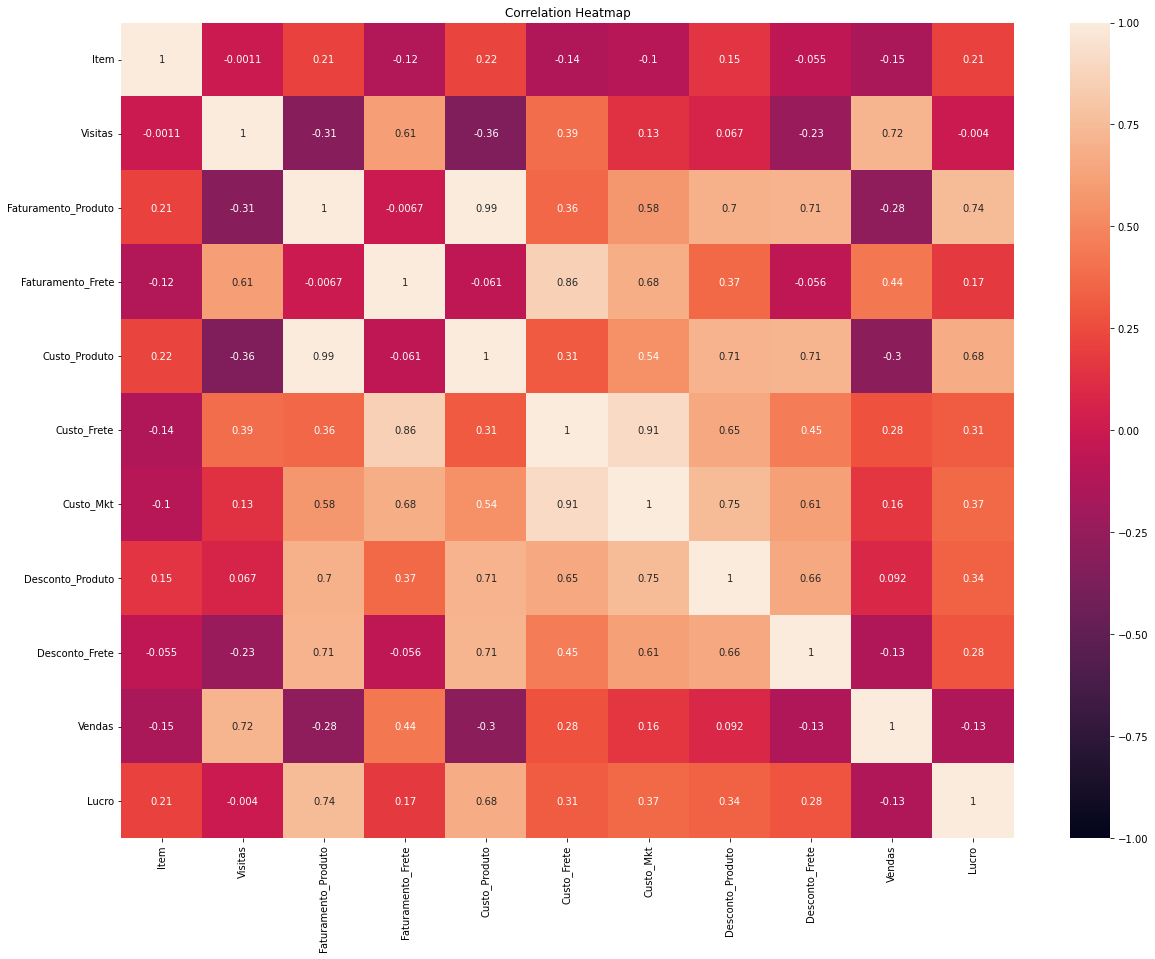

In [24]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df_join2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

Observando a matriz de correlação acima, o número de Vendas está intimamente atrelado ao número de Visitas (72%).

Por sua vez, o número de visitas está relacionado ao Faturamento de Frete (61%).

Já o Faturamento de Frete, está relacionado ao Custo de Frete (86%) e Custo de Marketing (68%).
<br><br>

Porém alto coeficiente de Pearson não indica causalidade. Seriam necessários mais dados e análises para sugestão de ações mais efetivas para o aumento de vendas.

### Cite outras conclusões importantes você conseguiu analisar.

**Faturamento de Produto**, **Custo de Produto** e **Desconto de Produto** são os que possuem mais pares com correlação forte ou muito forte (coeficientes de Pearson $\rho >= 0.7$)
<br>

Faturamento_Produto x Custo_Produto = 0.99

Faturamento_Produto x Desconto_Produto = 0.7

Faturamento_Produto x Desconto_Frete = 0.71
<br><br>

Custo_Produto x Faturamento_Produto = 0.99

Custo_Produto x Desconto_Produto = 0.71

Custo_Produto x Desconto_Frete = 0.71
<br><br>

Desconto_Produto x Faturamento_Produto = 0.7

Desconto_Produto x Custo_Produto = 0.71

Desconto_Produto x Custo_Mkt = 0.75
<br><br>

#### Esboço da Curva de Demanda e Otimização de Preço

Abaixo um esboço de como seria possível se aproximar de um preço ótimo usando os dados que foram fornecidos.

- **Curva de Demanda**

A curva de demanda pode ser aproximada na regressão linear de vendas vs preço unitário, onde o preço unitário é estimado dividindo o faturamento por vendas, pois não há registros individuais de cada venda.
Essa curva representa a equação linear abaixo:
$$Vendas = A * Preco\_Unitario + B$$

<Figure size 576x504 with 0 Axes>

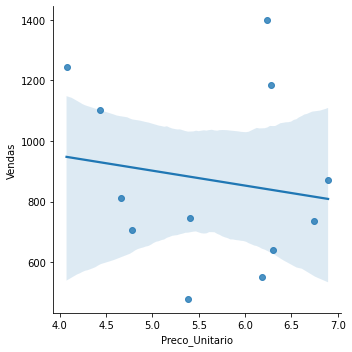

In [62]:
df['Custo_Unitario'] = df['Custo_Produto']/df['Vendas']
df['Preco_Unitario'] = df['Faturamento_Produto']/df['Vendas']
plt.figure(figsize=(8,7))
df_item_1 = df.loc[lambda d: (d['Item'] == 1) & (d['Departamento'] == 'Bolas de Gude'), :]
sns.lmplot(x = "Preco_Unitario", y = "Vendas", data = df_item_1)

Usando um modelo OLS podemos encontrar os parametros A e B da equação linear que descreve vendas em função do preço unitário.


In [77]:
# OLS model (Modelo de regressão linear)
from statsmodels.formula.api import ols

modelo = ols("Vendas ~ Preco_Unitario", data = df_item_1).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.2636
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.619
Time:                        18:38:26   Log-Likelihood:                -84.497
No. Observations:                  12   AIC:                             173.0
Df Residuals:                      10   BIC:                             174.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1147.9273    544.452      2.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


A e B são respectivamente 1147.9273 e -49.1643

- Otmização de preço usando os parametros da curva de demanda

O lucro pode ser aproximado por uma função de Preço e Vendas, conforme abaixo:
$$Lucro = (Preco\_Unitario - Custo) * Vendas$$

Obs: Para facilicar as contas o Custo será mantido como fixo.
Dessa forma, para encontrar um preço ótimo estimado basta randomizarmos alguns preços e aplicarmos na equação de Lucro. Como trata-se de uma estimação grosseira, será feita apenas observando o gráfico abaixo.

Preco medio unitario:  5.612350260649946
Preco unitario ideal (estimado): 12.5


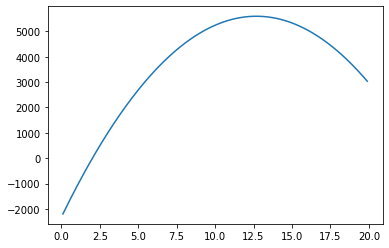

In [80]:
# Estimando preço que maximiza o lucro

# Range de preços
Preco = np.arange(0.1, 20, 0.1)

# Assumindo custo fixo
Custo = df_item_1['Custo_Unitario'].mean()

# Array de lucros para os precos simulados
Lucro = []

for i in Preco:
    Vendas = modelo.params.get(0) + modelo.params.get(1) * i
    Lucro.append((i-Custo) * Vendas)

# Datafrrame de Lucro e Preco
lucro_data_frame = pd.DataFrame({"Preco": Preco, "Lucro": Lucro})

# Plot final
plt.plot(lucro_data_frame["Preco"], lucro_data_frame["Lucro"])

# Preco ótimo
print("Preco medio unitario: ", df_item_1['Preco_Unitario'].mean())
print("Preco unitario ideal (estimado):", 12.5)

Mais conclusões constam no report.

# 3

## Agregando bases externas com as existentes

### Carregando os dados

Brazilian E-Commerce Public Dataset by Olist

https://www.kaggle.com/olistbr/brazilian-ecommerce

In [26]:
# traduziindo os nomes das categorias de produtos para Inglês
olist_products = pd.read_csv("olist_products.csv")
prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")
olist_products = olist_products.merge(prod_cat_name_tr, on='product_category_name', how='left')
olist_products.drop ('product_category_name', axis=1, inplace=True)

In [27]:
# carregando
olist_orders = pd.read_csv("olist_orders.csv")
olist_order_items = pd.read_csv("olist_order_items.csv")
olist_order_payments = pd.read_csv("olist_order_payments.csv")
olist_order_reviews = pd.read_csv("olist_order_reviews.csv")
olist_sellers = pd.read_csv("olist_sellers.csv")
olist_customers = pd.read_csv("olist_customers.csv")
olist_geolocation = pd.read_csv("olist_geolocation.csv")

### Junção das bases

![olist-data-schema](https://raw.githubusercontent.com/cintia-shinoda/americanas_desafio-tecnico/blob/master/imagens/olist-data-schema.png)

In [28]:
olist = olist_orders.merge(olist_order_items, on='order_id', how='left')
olist = olist.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
olist = olist.merge(olist_order_reviews, on='order_id', how='outer')
olist = olist.merge(olist_products, on='product_id', how='outer')
olist = olist.merge(olist_customers, on='customer_id', how='outer')
olist = olist.merge(olist_sellers, on='seller_id', how='outer')

In [29]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [31]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


### Limpeza

In [32]:
# substituição de valores nulos existentes nos títulos dos comentários e mensagens de comentários
olist['review_comment_title'] = olist['review_comment_title'].fillna('No title')
olist['review_comment_message'] = olist['review_comment_message'].fillna('No message')

In [33]:
# valores NaN
before_drop = olist.shape[0]
olist= olist.dropna()
after_drop = olist.shape[0]
print(f'Há {round(((before_drop-after_drop)/after_drop)*100,2)}% NaN')

Há 5.26% NaN


In [34]:
# datas
olist['order_purchase_timestamp'] = pd.to_datetime(olist.order_purchase_timestamp)
olist['order_approved_at'] = pd.to_datetime(olist.order_approved_at)
olist['order_delivered_carrier_date'] = pd.to_datetime(olist.order_delivered_carrier_date)
olist['order_delivered_customer_date'] = pd.to_datetime(olist.order_delivered_customer_date)
olist['order_estimated_delivery_date'] = pd.to_datetime(olist.order_estimated_delivery_date)
olist['shipping_limit_date'] = pd.to_datetime(olist.shipping_limit_date)
olist['review_creation_date'] = pd.to_datetime(olist.review_creation_date)

In [36]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113193 non-null  object        
 1   customer_id                    113193 non-null  object        
 2   order_status                   113193 non-null  object        
 3   order_purchase_timestamp       113193 non-null  datetime64[ns]
 4   order_approved_at              113193 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 6   order_delivered_customer_date  113193 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113193 non-null  datetime64[ns]
 8   order_item_id                  113193 non-null  float64       
 9   product_id                     113193 non-null  object        
 10  seller_id                      113193 non-null  object        
 11  

### Análise Exploratória

In [50]:
# consumidores
print(f'Há {len(olist.customer_unique_id.unique())} consumidores')

Há 91465 consumidores


In [51]:
# Geolocalização dos consumidores
print(f'Há {len(olist.customer_city.unique())} cidades')
print(f'Há {len(olist.customer_state.unique())} estados')

Há 4071 cidades
Há 27 estados


In [52]:
# Geolocalização dos vendedores
print(f'Há {len(olist.seller_city.unique())} cidades')
print(f'Há {len(olist.seller_state.unique())} estados')

Há 587 cidades
Há 22 estados


In [54]:
# Produtos
print(f'Há {len(olist.product_category_name_english.unique())} categorias de produtos')
print(f'Há {len(olist.product_name_lenght.unique())} produtos')

Há 71 categorias de produtos
Há 65 produtos


In [58]:
# Reviews
print(f'Há {len(olist.review_id.unique())} reviews')
print(f'{round(olist.review_score.mean())} é a nota média')

Há 94295 reviews
4 é a nota média


In [61]:
# Pagamentos
print(f'Há {len(olist.payment_type.unique())} tipos de pagamentos')
print(f'R${round(olist.payment_value.mean())} é o valor médio de pagamentos')

Há 4 tipos de pagamentos
R$172 é o valor médio de pagamentos


### Monte um plano de negócio de crescimento de 3 anos para empresa (levando em consideração ser uma empresa de e-commerce) baseado em geração de caixa (não esqueça de se basear em números)

O crescimento deve ser um desejo contínuo em qualquer empresa, mas é necessário que seja realizada de maneira escalável e segura.

Para tanto, há algumas informações necessárias, tais como:

#### **1 - Informações sobre o mercado**
1o. Semestre de 2021:

O crescimento se concentrou nos meses de Janeiro à Abril e apresentou desaceleração em Maio e Junho.

Os sites de busca e redes sociais são os principais caminhos para as lojas.

Faturamento e Pedidos via mobile se destaca frente ao desktop.

- Faturamento: R$ 53,4 bi (aumento de 31%)

- Ticket médio: R$ 534,42 (aumento de 22%)

- Frete grátis: número de pedidos com frete grátis cresceu 38%

- Pedidos: 100 mi (aumento de 7,4%)

- Mobile: 56,2% em faturamento (aumento de 28,4%)

- Norte, Centro-Oeste e Sul são as regiões com maior oportunidade de desenvolvimento em aplicativos de entrega

- Categoria de casa e decoração e esportivos mantiveram crescimento expressivo durante o primeiro semestre de 2021 

fonte: 44a. ed. Webshoppers

#### **2 - Estratégias do Negócio**

- tipo de expansão: 
    - orgânica ou por fusão/aquisição;
    - aumento ou troca de portfólio de produtos e serviços;
    - mirar outros perfis de consumidores;
    - troca de modalidades empresariais, como por exemplo, tornar-se exportador

#### **3 - Estratégias de Marketing**

#### **4 - Análise de Riscos e Concorrentes**

#### **5 - Planejamento Financeiro**


orçamento disponível com projeções de:

- fluxo de caixa;

- despesas e custos;

- expectativa de retorno;

- análise de gastos futuros;

#### **6 - Objetivos e Metas**

### Cite outras informações internas que você gostaria de ter para melhorar a projeção de 3 anos e justifique porquê seriam úteis na sua análise

Outras informações internas para melhorar a projeção seriam:
- **Impostos**: para a análise clara da movimentação e fluxo de recursos financeiros.
- **Quantas pessoas abandonaram o carrinho**: para entender onde podem estar os "gargalos" que podem atrapalhar a navegação e concretização da compra.
- **Itens comprados juntos**: ajudaria na sugestão de produtos para o cliente e montagem de combos que podem ser atrativos.
- **Variação dos preços dos produtos**: para analisar se o aumento e diminuição dos preços alteraram o número de vendas.
Com registros de venda individuais, seria possível realizar otimização do preço.
- **Perfil dos  clientes**: ajuda na sugestão de produtos e descontos que podem fazer a diferença na concretização ou não da compra.
- **Dados de um período maior**: ajudaria a obter uma análise mais assertiva, pois levaria em consideração fatores importantes tal como a sazonalidade.

## Pontos que gostaria de ter feito mais não deu tempo, ou não tem conhecimento mas gostaria de aprender.

**Análise dos comentários dos clientes (NLP)**

Serviria como "termômetro" de produtos que não agradam e poderiam ser retirados, poderia evidenciar: falhas na usabilidade da plataforma que devem ser corrigidos, falhas na logística e entrega, etc...
<br><br>

**Mais dados e tempo**

Para tentar sugerir ações efetivas para o aumento das vendas com assertividade e para analisar base de dados externas.
<br><br>

**label encoding e/ou one-hot-encoding**

Fazer tais transformações para que aplicação de modelos seja possível.
<br><br>

**Plano de Negócios**

Estudar como redigir um plano  de negócios.
<br><br>

**Análise de Séries Temporais**

Para previsões e descobrir tendências.